# Features analysing

In [1]:
import numpy as np
import math
import time
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')

import data
import features

In [2]:
temp, dico = data.load_input_data('../data/train_input.csv')
output = data.load_output_data('../data/challenge_output.csv', temp, dico)

** Variables:**
* **dico**: dictionnaire avec pour chaque nom de batiment les paramètres de réglages ayant subi un premier traitement. dico['buildings] = liste de tous les noms de building
* **temp**: outside temperature
* **output**: dictionnaire avec pour chaque nom de batiment les données à prédire. Le champs 'fields' contient les noms des 5 outputs:

**Outputs**:
* 0: office_temperature_degreC
* 1: Q_total_heating_kW
* 2: Q_total_AC_kW
* 3: Q_total_gains_kW
* 4: Q_total_kW

In [3]:
output['fields']

{'Q_total_AC_kW': 2,
 'Q_total_gains_kW': 3,
 'Q_total_heating_kW': 1,
 'Q_total_kW': 4,
 'office_temperature_degreC': 0}

In [4]:
print("Some buildings names:")
print(list(dico.keys())[:4])

Some buildings names:
['building_10_0', 'building_10_1', 'building_10_10', 'building_10_11']


In [5]:
name_building = 'building_10_1'
dico[name_building]

{'AC_WE_hours': [0.0, 6.75, 17.5, 24.0],
 'AC_WE_temperatures_degreC': [32.0, 27.56, 31.43, 31.43],
 'AC_monday_hours': [0.0, 7.0, 18.0, 24.0],
 'AC_monday_temperatures_degreC': [32.0, 24.55, 28.04, 28.04],
 'AC_power_kW': 603.58,
 'AC_week_hours': [0.0, 6.0, 19.5, 24.0],
 'AC_week_temperatures_degreC': [32.0, 24.6, 28.82, 28.82],
 'AHU_high_threshold': 22.0,
 'AHU_low_threshold': 18.0,
 'PCs_percent_on_night_WE': 0.2,
 'Phantom_use_kW': 192.89,
 'airchange_infiltration_m3perh': 0.18,
 'airchange_ventilation_m3perh': 0.79,
 'heating_WE_hours': [0.0, 7.5, 17.5, 24.0],
 'heating_WE_temperatures_degreC': [17.0, 20.9, 14.49, 14.49],
 'heating_monday_hours': [0.0, 5.0, 19.0, 24.0],
 'heating_monday_temperatures_degreC': [17.0, 20.5, 16.19, 16.19],
 'heating_power_kW': 180.09,
 'heating_week_hours': [0.0, 6.0, 18.5, 24.0],
 'heating_week_temperatures_degreC': [17.0, 22.62, 17.1, 17.1],
 'initial_temperature': 20.0,
 'light_percent_on_night_WE': 0.1,
 'lighting_Wperm2': 1.46,
 'nb_PCs': 467.0

In [6]:
def generate_a_day(hours, values, seuil_sup=10^6, seuil_inf=0):
    """ hours must be integers! """
    output_values = []
    output_in = []
    h_prec = hours[0]
    
    for i in range(1, len(hours)):
        h_next = hours[i]
        output_values += [values[i-1] for _ in range(h_prec, h_next)]
        
        if values[i-1] < seuil_sup and values[i-1] > seuil_inf:
            output_in += [1 for _ in range(h_prec, h_next)]
        else:
            output_in += [0 for _ in range(h_prec, h_next)]
        
        h_prec = h_next
        
    return output_values, output_in

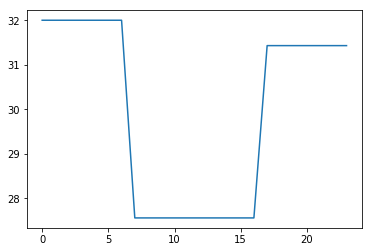

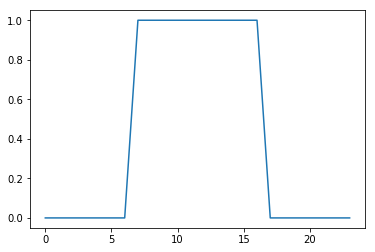

In [7]:
output_values, output_in = generate_a_day([0, 7, 17, 24], [32.0, 27.56, 31.43, 31.43], seuil_sup=31)
plt.plot(output_values)
plt.show()

plt.plot(output_in)
plt.show()

** Traitement des données par semaine ** -> features_df

In [8]:
features_df = features_adele.extract_features(dico, temp, name_building)
features_df.head()

364 jours et 52 semaines


,AC_in,AC_power_kW,AC_value,AHU_high_threshold,AHU_low_threshold,PCs_percent_on_night_WE,Phantom_use_kW,airchange_infiltration_m3perh,airchange_ventilation_m3perh,heating_in,...,surface_4_m2_OUTW,surface_m2_GROU,surface_m2_INTW,surface_m2_ROOF,useful_surface_m2,volume2capacitance_coeff,window_percent_1_outwall,window_percent_2_outwall,window_percent_3_outwall,window_percent_4_outwall
0,0,603.58,32.0,22.0,18.0,0.2,192.89,0.18,0.79,0,...,1109.55,1450.0,8000.0,1450.0,6073.55,34.11,70.0,70.0,70.0,70.0
1,0,603.58,32.0,22.0,18.0,0.2,192.89,0.18,0.79,0,...,1109.55,1450.0,8000.0,1450.0,6073.55,34.11,70.0,70.0,70.0,70.0
2,0,603.58,32.0,22.0,18.0,0.2,192.89,0.18,0.79,0,...,1109.55,1450.0,8000.0,1450.0,6073.55,34.11,70.0,70.0,70.0,70.0
3,0,603.58,32.0,22.0,18.0,0.2,192.89,0.18,0.79,0,...,1109.55,1450.0,8000.0,1450.0,6073.55,34.11,70.0,70.0,70.0,70.0
4,0,603.58,32.0,22.0,18.0,0.2,192.89,0.18,0.79,0,...,1109.55,1450.0,8000.0,1450.0,6073.55,34.11,70.0,70.0,70.0,70.0


### Analyse de la consommation en clim

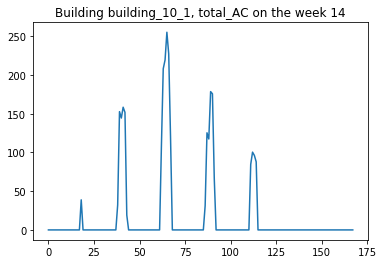

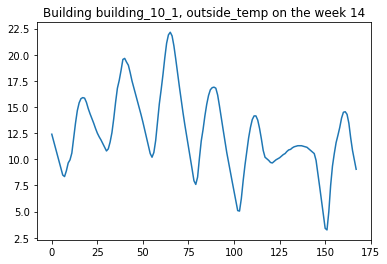

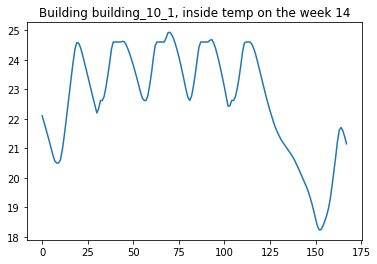

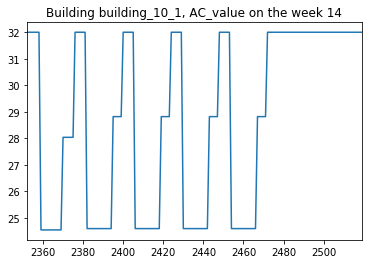

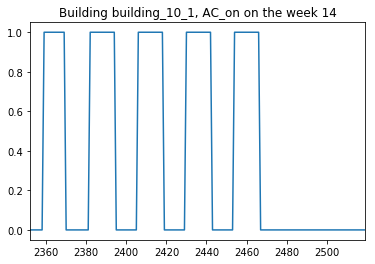

In [9]:
num_sem = 14
plt.plot(output[name_building][num_sem*7*24:(num_sem+1)*7*24, output['fields']['Q_total_AC_kW']])
plt.title('Building {}, total_AC on the week {}'.format(name_building, num_sem))
plt.show()

plt.plot(temp[num_sem*7*24:(num_sem+1)*7*24])
plt.title('Building {}, outside_temp on the week {}'.format(name_building, num_sem))
plt.show()

plt.plot(output[name_building][num_sem*7*24:(num_sem+1)*7*24, 0])
plt.title('Building {}, inside temp on the week {}'.format(name_building, num_sem))
plt.show()

features_df['AC_value'][num_sem*7*24:(num_sem+1)*7*24].plot()
plt.title('Building {}, AC_value on the week {}'.format(name_building, num_sem))
plt.show()

features_df['AC_in'][num_sem*7*24:(num_sem+1)*7*24].plot()
plt.title('Building {}, AC_on on the week {}'.format(name_building, num_sem))
plt.show()

## Analyse de AC: quand se déclenche-t-elle ? 

In [10]:
col_AC = output['fields']['Q_total_AC_kW']

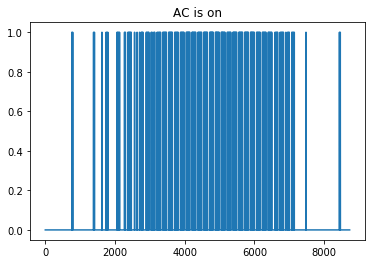

In [11]:
is_AC = [int(output[name_building][x, col_AC] != 0) for x in range(len(output[name_building]))]

plt.plot(is_AC)
plt.title('AC is on')
plt.show()

In [12]:
import sklearn
from sklearn import tree

In [45]:
def train_tree(y_var, x_vars, max_depth=None):
    model_tree = tree.DecisionTreeClassifier(max_depth=max_depth)

    X_data = np.array(x_vars)
    n, m = np.shape(X_data)
    if m < 2:
        X_data = np.reshape(X_data, (len(X_data), 1))
    Y_data = np.reshape(y_var, (len(y_var), 1))

    model_tree.fit(X_data, Y_data)

    score = model_tree.score(X_data, Y_data)
    print("Score train: {}%".format(round(score*100, 2)))
    return model_tree

In [50]:
model1 = train_tree(is_AC, features_df[['outside_temp', 'AC_value']], max_depth=3)

Score train: 95.43%


In [23]:
model_tree = train_tree(is_AC, features_df)

Score train: 99.66%


In [16]:
features_df.columns

Index(['AC_in', 'AC_power_kW', 'AC_value', 'AHU_high_threshold',
       'AHU_low_threshold', 'PCs_percent_on_night_WE', 'Phantom_use_kW',
       'airchange_infiltration_m3perh', 'airchange_ventilation_m3perh',
       'heating_in', 'heating_power_kW', 'heating_value', 'hour',
       'initial_temperature', 'light_percent_on_night_WE', 'lighting_Wperm2',
       'nb_PCs', 'nb_occupants', 'orientation', 'outside_temp',
       'surface_1_m2_OUTW', 'surface_2_m2_OUTW', 'surface_3_m2_OUTW',
       'surface_4_m2_OUTW', 'surface_m2_GROU', 'surface_m2_INTW',
       'surface_m2_ROOF', 'useful_surface_m2', 'volume2capacitance_coeff',
       'window_percent_1_outwall', 'window_percent_2_outwall',
       'window_percent_3_outwall', 'window_percent_4_outwall'],
      dtype='object')

In [47]:
def save_image_tree(model, features_name, path_name):
    dotfile = open(path_name + ".dot", 'w')
    tree.export_graphviz(model, out_file=dotfile, feature_names=features_name)
    dotfile.close()
    #os.system("dot -Tpng D:.dot -o {}.png".format(path_name))

In [51]:
save_image_tree(model1, ['outside_temp', 'AC_value'], "./data/tree")